# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

import torch
from torch import nn, optim
import torch.nn.functional as F

import torchvision
from torchvision import transforms

# Set Device for Training Using Apple M1

In [12]:
device = torch.device('mps:0' if torch.backends.mps.is_available() else 'cpu')
print(device)

mps:0


# Load Datasets and Set Custom Loader

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(
    root = './data', train = True,
    download = True, transform = transform
)

trainloader = torch.utils.data.DataLoader(
    trainset, batch_size = batch_size,
    shuffle = True, num_workers = 6
)

testset = torchvision.datasets.CIFAR10(
    root = './data', train = False,
    download = True, transform = transform
)

testloader = torch.utils.data.DataLoader(
    testset, batch_size = batch_size,
    shuffle = True, num_workers = 6
)

classes = (
    'plane', 'car', 'bird', 'cat',
    'deer', 'dog', 'frog', 'horse',
    'ship', 'truch'
)

Files already downloaded and verified
Files already downloaded and verified


## Take a look of the dataset

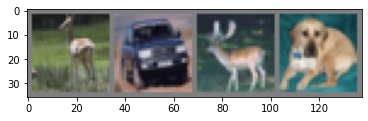

deer  car   deer  dog  


In [3]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

# Define a Convolution Neural Network

In [15]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

In [16]:
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

## Define a loss function and optimizer

In [17]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr = 1e-4)

# Train the Network

In [18]:
for epoch in range(2):
    running_loss = 0.0
    
    for i, data in enumerate(trainloader, 0):
        # inputs, labels = data
        inputs, labels = data[0].to(device), data[1].to(device)
        
        # zero the parameter gradients
        optimizer.zero_grad()
        
        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999: # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d} loss: {running_loss / 2000:.3f}]')
            running_loss = 0.0

print('Finished Training')

[1,  2000 loss: 2.052]
[1,  4000 loss: 1.849]
[1,  6000 loss: 1.742]
[1,  8000 loss: 1.686]
[1, 10000 loss: 1.638]
[1, 12000 loss: 1.624]
[2,  2000 loss: 1.563]
[2,  4000 loss: 1.567]
[2,  6000 loss: 1.504]
[2,  8000 loss: 1.497]
[2, 10000 loss: 1.501]
[2, 12000 loss: 1.474]


KeyboardInterrupt: 